# Lab Chapter 3

### Load packages and read in data

In [2]:
library(MASS)
library(ISLR)
library(tidyverse)

### Modelling the Boston data - simple linear regression

In [106]:
lm_fit = lm(medv ~ lstat, data = Boston)
lm_fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


This gives us basic information like coefficients and the intercept.

In [3]:
summary(lm_fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


The summary function provides more detailed information.

In [4]:
coef(lm_fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

A direct way to extract the coefficient values is to use the **coef()** function.

In [5]:
confint(lm_fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


It's possible to see the confidence intervals for the coefficients by using the **confint()** function.

In [6]:
new_data = 
    tribble(
    ~lstat,
    #-----/
        5,
        10,
        15)

In [7]:
# Confidence intervals
predict(lm_fit, 
        newdata = new_data, 
        interval = "confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [8]:
# Prediction intervals
predict(lm_fit, 
        newdata = new_data, 
        interval = "prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


The predict function can be used to produce confidence intervals and prediction intervals. Here, the 95% confidence interval associated with lstat = 10 is 24.47 - 25.63. The 95% prediction interval associated with lstat = 10 is 12.82 - 37.27.

In [12]:
attach(Boston)

plt = 
    ggplot(mapping = aes(x = lstat, y = medv)) + 
    geom_point() +
    geom_smooth(method = "lm",
                se = FALSE,
                color = "red")

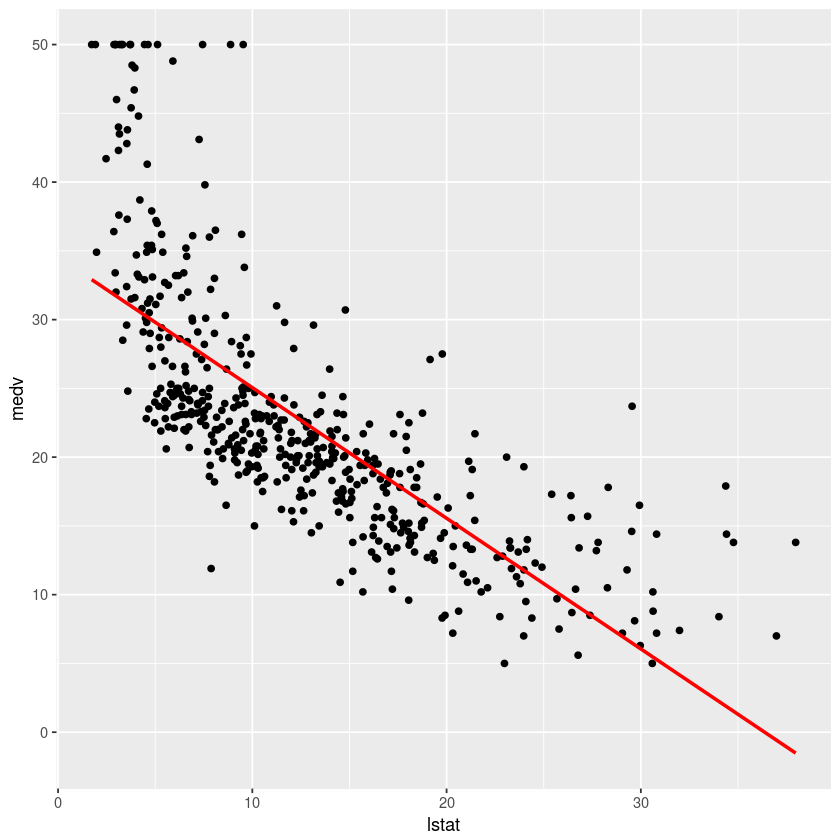

In [13]:
plt

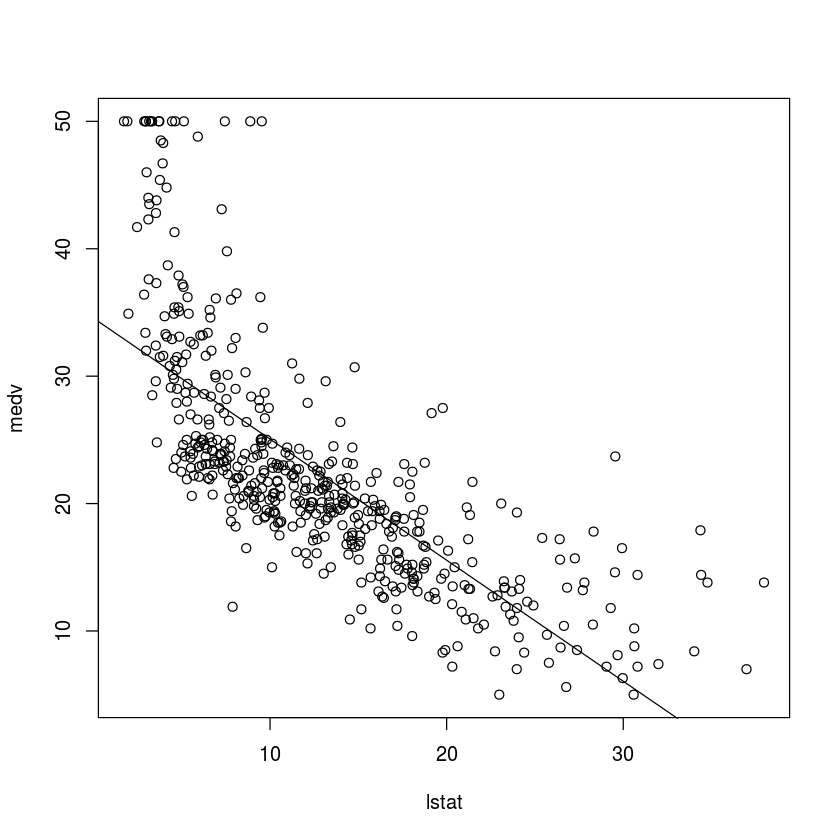

In [16]:
plot(lstat, medv)
abline(lm_fit)

The same thing can be plotted in base plots or ggplot2.

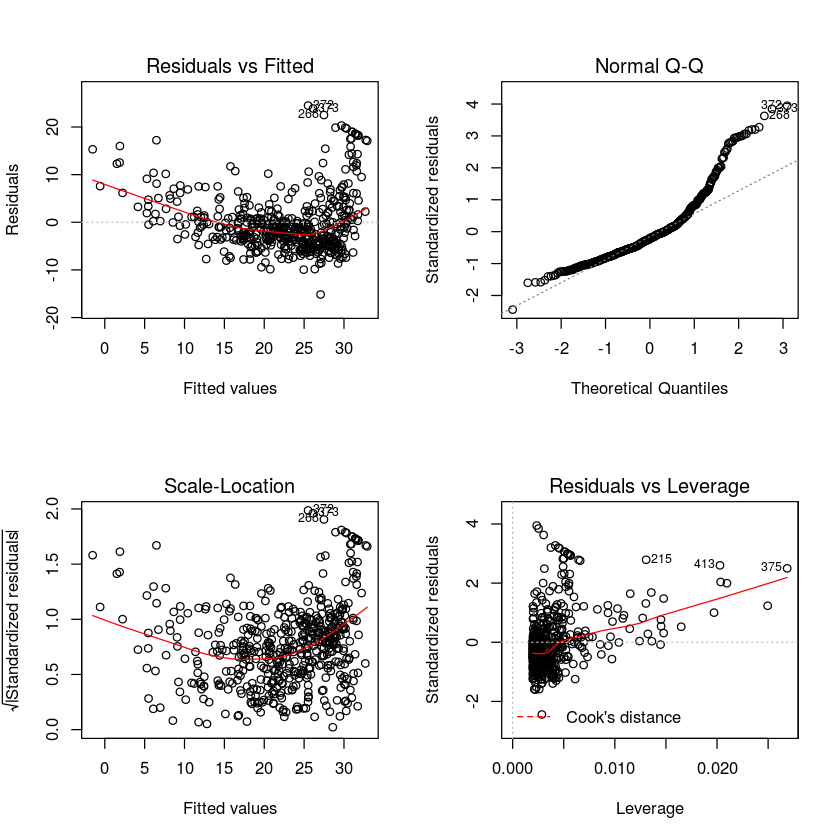

In [19]:
par(mfrow = c(2,2))
plot(lm_fit)

Asking for a plot of the linear model will give residual plots and various other useful plots.

In [21]:
head(residuals(lm_fit))

1          2          3          4          5          6 
-5.8225951 -4.2703898  3.9748580  1.6393042  6.7099222 -0.9040837

Residuals can be extracted directly using the **residuals()** function.

In [23]:
head(rstudent(lm_fit))

1          2          3          4          5          6 
-0.9386391 -0.6875112  0.6406663  0.2642362  1.0818817 -0.1456097

The studentized residual values can be returned using the **rstudent()** function.

In [49]:
# Get predicted values according to model and unstandardized residuals
predicted_train = predict(lm_fit)
residuals = residuals(lm_fit)
std_residuals = studres(lm_fit)

df = as.tibble(cbind(predicted_train, residuals))
df2 = as.tibble(cbind(predicted_train, std_residuals))

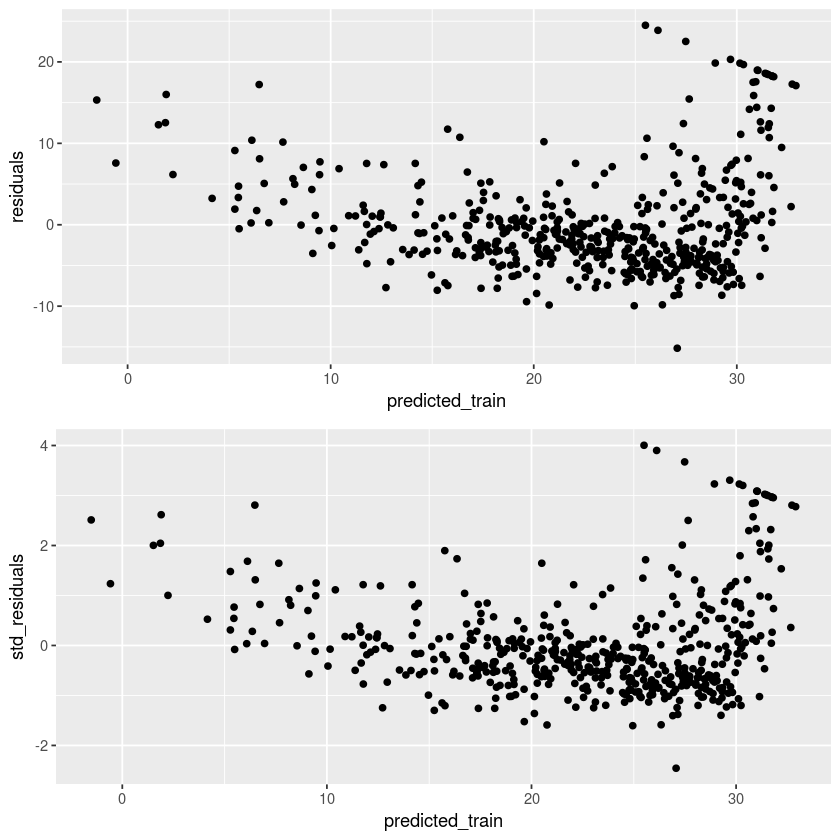

In [54]:
library(ggpubr)

# Plot predicted against residuals
unstandardized = 
    ggplot(data = df, aes(x = predicted_train, y = residuals)) + 
    geom_point()

studentized = 
    ggplot(data = df, aes(x = predicted_train, y = std_residuals)) +
    geom_point()

ggarrange(unstandardized, studentized, 
          nrow = 2, ncol = 1)

It's also possible to plot residual plots manually.

In [57]:
head(hatvalues(lm_fit))

1           2           3           4           5           6 
0.004262518 0.002455527 0.004863680 0.005639779 0.004058706 0.004127513

Leverage statistics can be computed using the **hatvalues()** function.

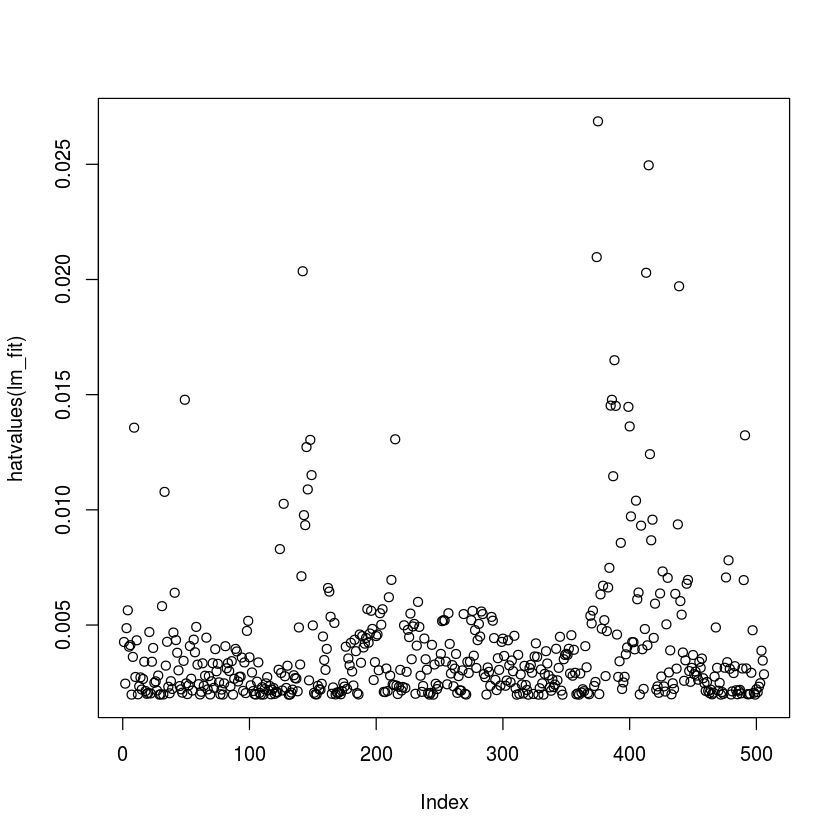

In [73]:
plot(hatvalues(lm_fit))

Leverage points can be plotted easily.

In [77]:
sprintf("The observation with the largest leverage statistic is: %s", 
        which.max(hatvalues(lm_fit)))

[1] "The observation with the largest leverage statistic is: 375"

### Multiple linear regression

In [84]:
lm_fit = lm(medv ~ lstat + age, data = Boston)
summary(lm_fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


Both features: lstat and age are significant.

In [85]:
lm_fit = lm(medv ~ ., data = Boston)
summary(lm_fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

The "." notation can be used to fit all the features.

In [90]:
library(car)
vif(lm_fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

The VIF statistic can be calculated using the **vif()** function.

In [95]:
lm_fit = lm(medv ~ . -age, data = Boston)

It's possible to selectively remove features from the model.

In [104]:
lm_fit = lm(medv ~ lstat * age, data = Boston)
summary(lm_fit)


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [99]:
lm_fit = lm(medv ~ lstat:age, data = Boston)
summary(lm_fit)


Call:
lm(formula = medv ~ lstat:age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.347  -4.372  -1.534   1.914  27.193 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.1588631  0.4828240   62.46   <2e-16 ***
lstat:age   -0.0077146  0.0003799  -20.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.827 on 504 degrees of freedom
Multiple R-squared:  0.4501,	Adjusted R-squared:  0.449 
F-statistic: 412.4 on 1 and 504 DF,  p-value: < 2.2e-16


It's possible to model interaction effects with either the "*" symbol or the ":" symbol. Using the "*" adds the main effects and the interaction effect. Using the ":" adds only the interaction term.

In [103]:
lm_fit2 = lm(medv ~ lstat + I(lstat**2))
summary(lm_fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


Non linear feature/target relationships can be modeled with non-linear transformations of the features. Make sure to wrap the transformation around the function **I()**.

In [115]:
lm_fit = lm(medv ~ lstat, data = Boston)
anova(lm_fit, lm_fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


The p-value associated with the f statistic shows the model with the quadratic term is superior.

In [121]:
lm_fit3 = lm(medv ~ poly(lstat, 3))
summary(lm_fit3)


Call:
lm(formula = medv ~ poly(lstat, 3))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5441  -3.7122  -0.5145   2.4846  26.4153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2399  93.937  < 2e-16 ***
poly(lstat, 3)1 -152.4595     5.3958 -28.255  < 2e-16 ***
poly(lstat, 3)2   64.2272     5.3958  11.903  < 2e-16 ***
poly(lstat, 3)3  -27.0511     5.3958  -5.013 7.43e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.396 on 502 degrees of freedom
Multiple R-squared:  0.6578,	Adjusted R-squared:  0.6558 
F-statistic: 321.7 on 3 and 502 DF,  p-value: < 2.2e-16


The **poly()** function is an easy way to fit polynomial features.

In [123]:
lm_fit4 = lm(medv ~ log(lstat))
summary(lm_fit4)


Call:
lm(formula = medv ~ log(lstat))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4599  -3.5006  -0.6686   2.1688  26.0129 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  52.1248     0.9652   54.00   <2e-16 ***
log(lstat)  -12.4810     0.3946  -31.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.329 on 504 degrees of freedom
Multiple R-squared:  0.6649,	Adjusted R-squared:  0.6643 
F-statistic:  1000 on 1 and 504 DF,  p-value: < 2.2e-16


We can also use other functions like **log()**. Not limited to **poly()**!

### Dealing with qualitative predictors

In [127]:
lm_fit = lm(Sales ~ . + 
            Income:Advertising +
            Price:Age,
            data = Carseats)

summary(lm_fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

ShelveLoc for example has 3 possible values: Bad, Medium and Good. This is automatically dummy coded by the lm() function.

In [136]:
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


We can use the **contrasts()** function to explicitly see the dummy coding.